In [1]:
from IPython.display import display, Image
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### 链式法则

#### 案例一

　　已知 y = g(x)，z = h(y)，改变x的值通过g的函数，会改变y的值（y = g(x)），y的值改变通过h的函数改变了z的值（z = h(y)）

$$ \Delta x\rightarrow \Delta y\rightarrow \Delta z  $$

　　即要通过改变x的值来改变z的值，先改变x的值改变y，在通过改变y的值改变z的值：

 $$ \frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx} $$

#### 案例二

　　已知 x = g(s)，y = h(s)，z = k(x, y)。当改变s的值时，通过g和h的函数，分别改变x和y值，最后改变z的值。所以s值对z值的改变，是通过分别改变x和y值，进而改变z的值

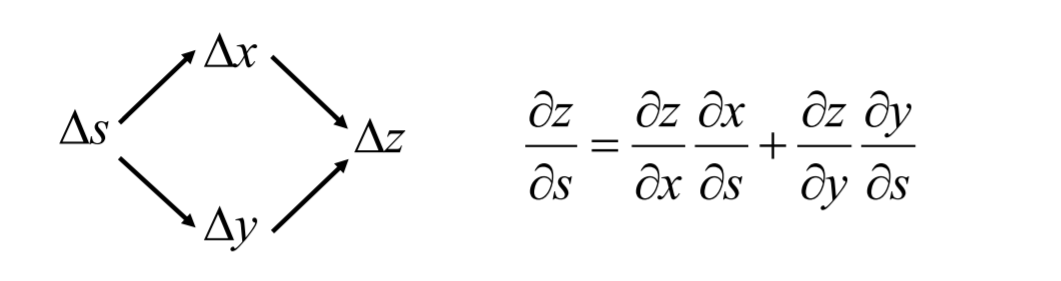

In [2]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/Backpropagation/\
back_propagation01.png')

### ∂C/∂w分成两项∂z/∂w和∂C/∂z相乘

　　$W_{ij}$表示从神经元 j 连接到神经元 i 的权重，改变权重 w 的值，会改变神经元 i 的输入值，即激活函数的输入$z_{i}$，然后改变输出$a_{i}$，经过一连串效应，最后改变损失函数C，所以∂C/∂w可以写成两项的相乘，如下图：

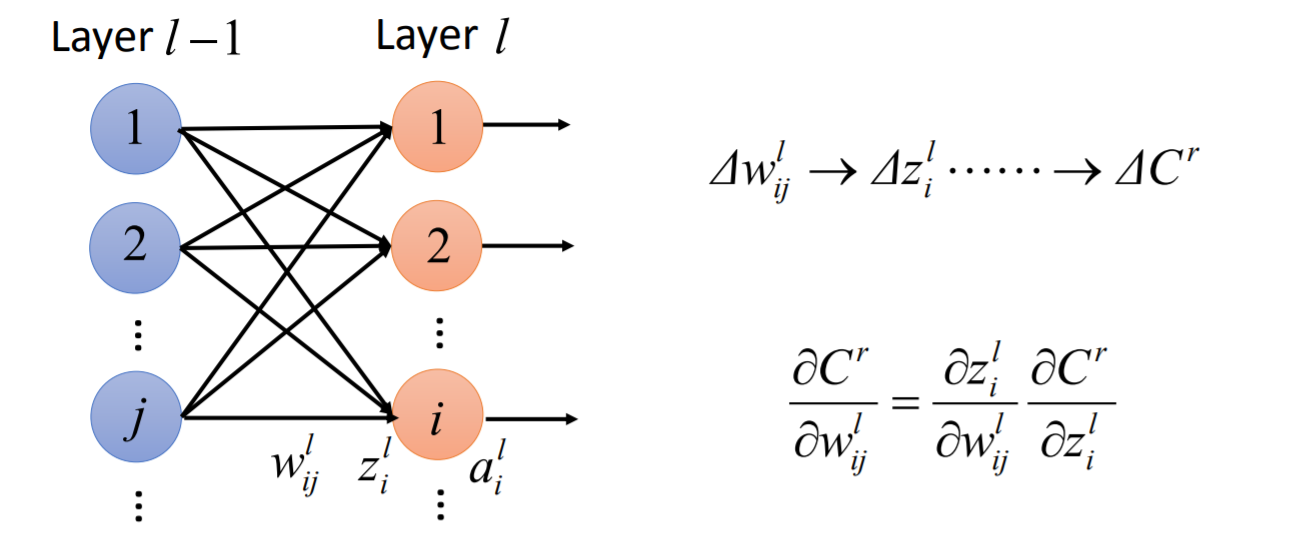

In [3]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Backpropagation/back_propagation02.png')

#### 第一项，计算∂z/∂w分两种情况，一种神经元的第l-1层为输入层，另一种为隐藏层：

　　第一种情况，如果 $l$ 大于1，即为隐藏层，则激活函数的输入如左下，对连接到每个神经元i进行求导后如右下：

$$ z_{i}^{l} = \sum_{1}^{J} w_{ij}^{l} a_{j}^{l-1} + b_{i}^{l} \ \ \ \ \ \ \ \ \ \    \frac{\partial z_{i}^{l}}{\partial w_{ij}^{l}}  = a_{j}^{l-1}$$

　　第二种情况，当 $l$ 等于1时， $l-1$ 层则为输入层，则激活函数的输入如左下，对连接到每个神经元i进行求导后如右下：

$$ z_{i}^{l} = \sum_{1}^{J} w_{ij}^{l} x_{j}^{r} + b_{i}^{l} \ \ \ \ \ \ \ \ \ \    \frac{\partial z_{i}^{l}}{\partial w_{ij}^{l}}  = x_{j}^{r}$$

#### 第二项，把∂C/∂z命名为δ(l)，问题变成计算δ(L)，然后计算δ(L)和δ(L-1)的关系，以此往回推，即反向传播

　　问题1，如何计算δ(L)？

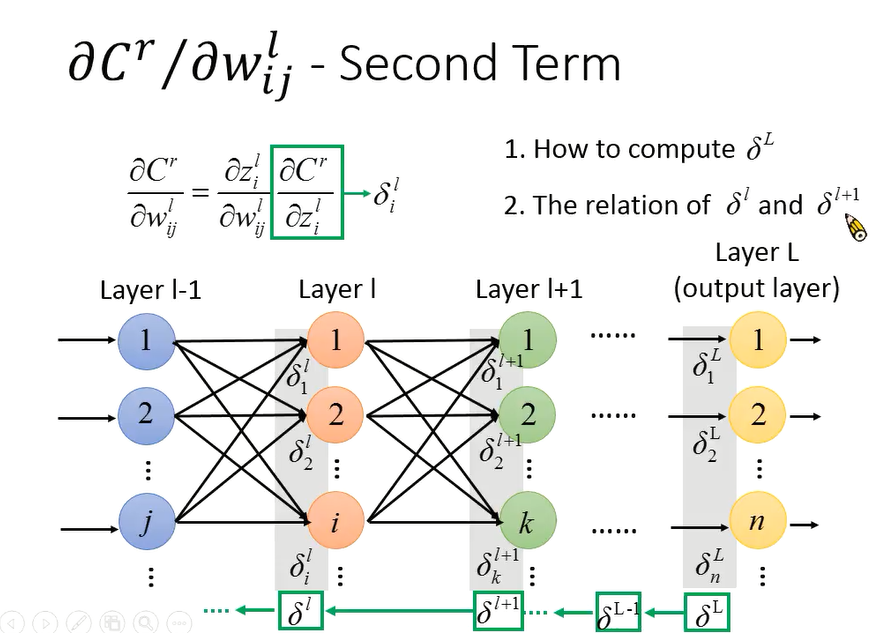

In [4]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/\
master/Backpropagation/back_propagation03.png')

　　第二项δ(l)，改变激活函数输入的值时∆z，会改变神经元的输出，而改变一个神经元的输出，则改变整个网络的输出，最后影响到损失函数。即激活函数的输入（前一层神经网络的输出 a， z=wa+b）→神经元的输出（通过激活函数转化）→改变整个网络的输出→改变损失函数。写成公式则如右下，所以可对其拆解成左下：

$$ \delta _{n}^{L} = \frac{\partial C^{r}}{\partial z_{n}^{L}} = \frac{\partial y_{n}^{r}}{\partial z_{n}^{L}}\frac{\partial C^{r}}{\partial y_{n}^{r}} \ \ \ \ \ \ \ \Delta z_{n}^{L}\rightarrow \Delta a_{n}^{L}=\Delta y_{n}^{r}\rightarrow \Delta C^{r} $$

　　∂C/∂y的微分，取决于定义的损失函数，如损失函数为1/2*(y-r)^2，则其微分为(y-r)，而∂y/∂z即对激活函数进行微分，在z值这个地方。换句话说，∂C/∂y是对损失函数进行微分，而∂y/∂z是对激活函数进行微分。

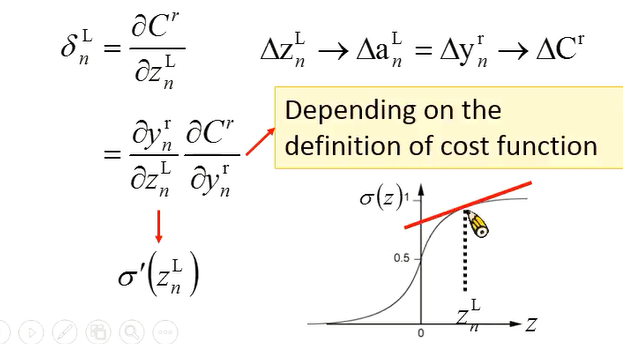

In [5]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Backpropagation/back_propagation04.png')

　　问题2，如何计算第L层的δ和第L-1层的δ的关系？

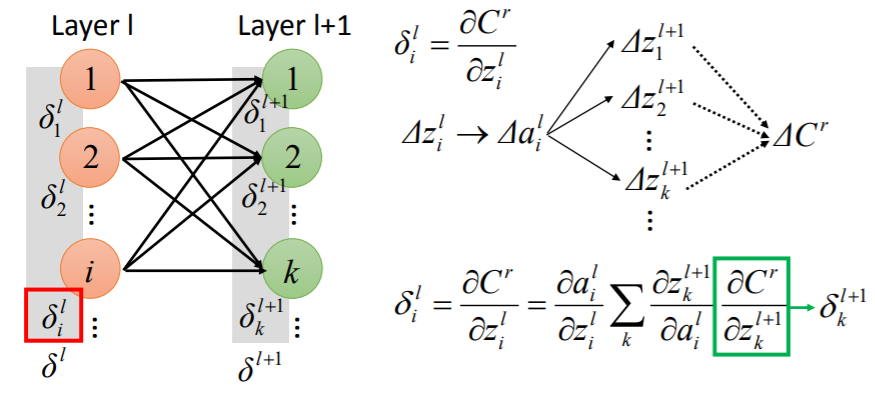

In [6]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/master/\
Backpropagation/back_propagation05.png')

　　改变第 $l$ 层激活函数的输入 $z_{i}^{l}$ 会改变第 $l$ 层神经元 $a_{i}^{l}$ 的输出，而第 $l$ 层神经元的输出 $a_{i}^{l}$ 影响到第 $l+1$ 层的每个神经元的激活函数的输入 $\sum_{1}^{k} z_{k}^{l+1}=w_{ki}^{l+1} a_{i}^{l}+b_{k}^{l+1}$，从而改变第 $l+1$ 层神经元的输出 $a_{i}^{l+1}$，最后影响到损失函数。写成公式如右上，绿色框参考问题1的推导

$$ \delta _{i}^{l} = \frac{\partial C^{r}}{\partial z_{i}^{l}} =\frac{\partial a_{i}^{l}}{\partial z_{i}^{l}} \sum_{1}^{k} \frac{\partial z_{k}^{l+1}}{\partial a_{i}^{l}} \frac{\partial C^{r}}{\partial z_{k}^{l+1}} =  \frac{\partial a_{i}^{l}}{\partial z_{i}^{l}} \sum_{1}^{k} \frac{\partial z_{k}^{l+1}}{\partial a_{i}^{l}} \delta _{k}^{l+1} $$

　　其中：$$ \frac{\partial a_{i}^{l}}{\partial z_{i}^{l}} = {\sigma }'(z_{i}^{l}) \ \ \ \ \ \ \ \partial z_{k}^{l+1} = \sum_{1}^{i} w_{ki}^{l+1} a_{i}^{l} + b_{k}^{l+1} $$

　　最后可得：$$ \delta _{i}^{l} =  {\sigma }'(z_{i}^{l})  \sum_{1}^{k} w_{ki}^{l+1} \delta _{k}^{l+1} $$

　　即第  $l$ 层的第i个神经元δ和第 $l+1$ 层的每个神经元δ的关系，用图来表示则如下，看成一种新的神经元计算方式：

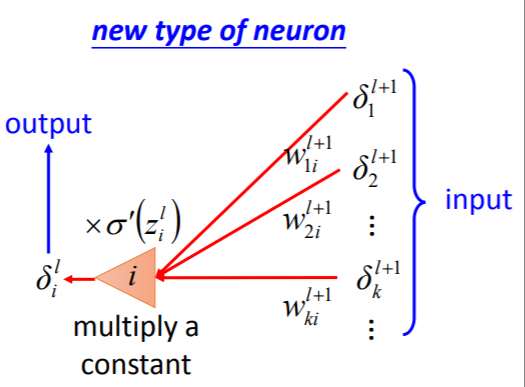

In [7]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/\
master/Backpropagation/back_propagation06.png')

　　知道第 $l$ 层的第 i 个神经元δ和第 $l+1$ 层的每个神经元δ的关系，可求出第 $l$ 层的每个神经元δ和第 $l+1$ 层的每个神经元δ的关系，即第 $l$ 层的δ和第 $l+1$ 层的δ的关系：

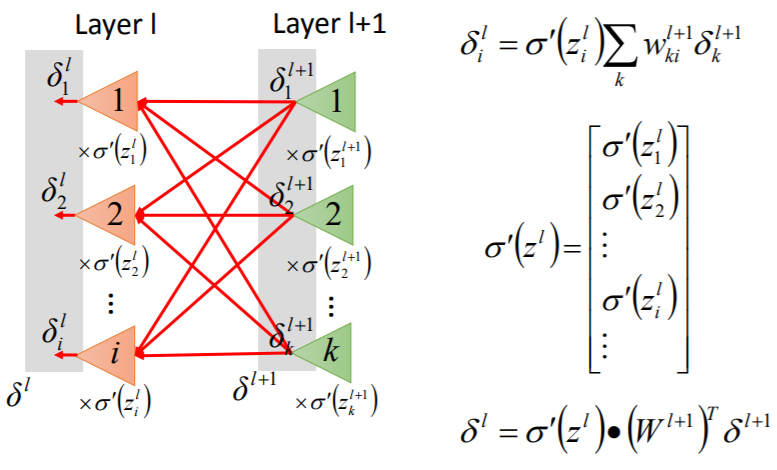

In [8]:
Image('https://raw.githubusercontent.com/martin-1992/deep-learning-note/\
master/Backpropagation/back_propagation07.png')

　　图中右上公式第 $l+1$ 层的 $w_{ki}$ 表示第 $l$ 层的第 i 个神经元到第 $l+1$ 层的所有神经元(1~k)的权重，写成矩阵形式图中右下

　　正向传播与反向传播的公式：$$ \delta ^{l} = {\sigma }'(z^{l})\cdot (W^{l+1})^{T}\delta ^{l+1} \ \ \ \ \ \ \ \ \ \ a^{l+1} = \sigma (W^{l+1}a^{l} + b^{l+1})$$